In [1]:
import numpy as np
import scipy as sp
from scipy import optimize as op
from scipy import linalg
import math
from copy import deepcopy
import matplotlib.pyplot as plt
# from sympy import symbols, Matrix # not used???

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [39]:
np.round(1.1, 1)

1.1

In [33]:
class Solution:
    def __init__(self, m, c, b, eps=1e-3):
        self.b_ = b / m
        self.c_ = c / m
        self.roots = None
        self.order = 5
        self.eps = eps

    def find_eigen_vectors(self):
        '''
            A q'' + Bq' + Cq = 0 -> x = q'
            q' = x
            Ax' + Bx + Cq = 0 and A = I_{4, 4}!
            So we get following equation:
            [q]'  [0     E][q]
            [ ] = [       ][ ]
            [x]   [-B   -C][x]
        '''
        if not self.roots is None:
            return deepcopy(self.vectors)

        # init matrix B, C
        B = np.zeros((4, 4), dtype=np.complex); B[0, 0] = self.b_
        C = np.array([
            [2, -1, 0, -1],
            [-1, 2, -1, 0],
            [0, -1, 2, -1],
            [-1, 0, -1, 2]
        ], dtype=np.complex) * self.c_

        # find matrices
        first_part = np.hstack((np.zeros((4, 4)), np.eye(4)))
        second_part = np.hstack((-C, -B))
        equation_matr = np.vstack((first_part, second_part))

        # find eigenvectors
        self.roots, vec = linalg.eig(equation_matr, np.eye(8), right=True)
        self.vectors = vec.T

        # we need only vectors for q
        self.cutted_vectors = self.vectors[:, :4]
        return deepcopy(self.vectors)


    def solve(self, q_0):

        self.find_eigen_vectors()

        # find the equation matrix
        eq_matr = deepcopy(self.vectors).T

        # find q_0
        q_0 = np.array(q_0).reshape(-1, 1)
        if q_0.shape[0] == 4:
            q_0 = np.vstack((q_0, np.zeros((4, 1))))

        print(q_0.shape)
        print(eq_matr.shape)
        # find constants
        self.constants = linalg.solve(eq_matr, q_0)

    def q(self, t, eps=1e-3):
        coords_ = np.zeros(4, dtype=complex)
        for i in range(len(self.roots)):
            coords_ += self.constants[i] * self.cutted_vectors[i] * np.exp(t * self.roots[i])
        return coords_

# eq = Solution(1, 0.5, 2)
# eq.solve((1, 0, -1, 0))

In [34]:
eq = Solution(1, 0.5, 2)
eq.solve((1, 0, -1, 0))

times = np.linspace(0, 10, 100)
coords = []
for t in times:
    coords.append(eq.q(t))

coords = np.array(coords)

(8, 1)
(8, 8)


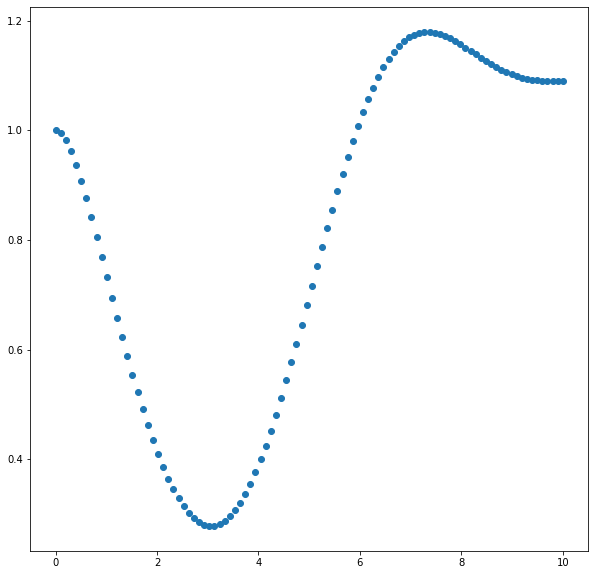

In [38]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.scatter(times, np.real(coords[:, 0]))

It is integesting to observe how roots depend on $\beta$. And I also suppose that $\widehat{c} = 1$.

In [214]:
# with plt.style.context('seaborn-darkgrid'):?
m = 1
c = 1

roots = []

for beta in np.linspace(0, 5, 15):
    eq = Solution(m, beta, c)
    curr_roots = eq.find_roots()
    for root in curr_roots:
        roots.append((beta, root))

roots = np.array(roots)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


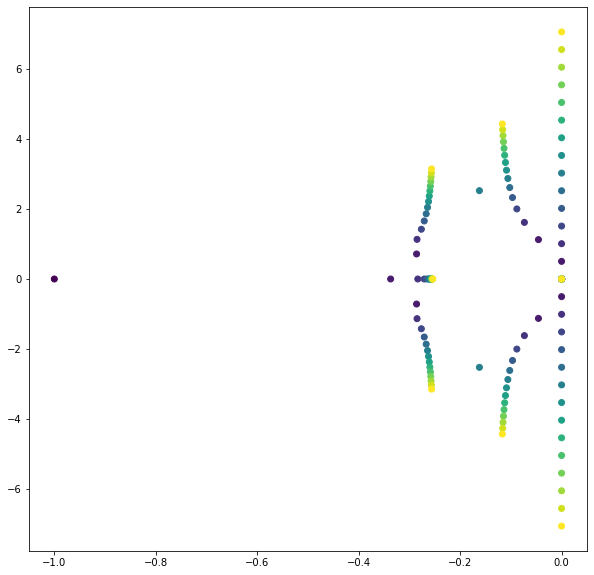

In [215]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax.scatter(np.real(roots[:, 1]), np.imag(roots[:, 1]), c=(roots[:, 0] + 1))